In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [10]:
sns.set(style="whitegrid", palette="muted", font_scale=1.1)
mature_miRNA_sequences_path = "/home/l/leitzb/miRNA/Harmonization-of-miRNA-databases/output/mature_miRNA_sequence.csv"
mirna_sequence_records_path = "/home/l/leitzb/miRNA/Harmonization-of-miRNA-databases/output/mirna_sequence_records.csv"

sequence_df = pd.read_csv(mature_miRNA_sequences_path)
data_df = pd.read_csv(mirna_sequence_records_path, dtype={"source_db_version": str, "taxon_id": str})

In [3]:
def set_plot_styles():

    styles = {
        # remove the top and right spines from the plots
        'axes.spines.right': False,
        'axes.spines.top': False,
        
        # color palette configuration
        'image.lut': 256,
        'axes.prop_cycle': mpl.cycler('color', ['#AF3029','#5E409D', '#BC5215', '#AD8301', '#66800B', '#24837B', '#205EA6' , '#A02F6F']),
        
        # retina figures configuration
        'figure.dpi': 300,
        'savefig.dpi': 300,
    }
    
    mpl.rcParams.update(styles)

In [11]:
# Aggregate count informations into summary_df
# Count relevant statistics per database
per_db_df = data_df.groupby("source_db").agg( 
    number_of_miRs=("miRNA_id", "nunique"),
    number_of_organisms=("taxon_id", "nunique"),
    rice_counts=("miRNA_id", lambda x: x[data_df.loc[x.index, "taxon_id"].isin(["4530", "4538"])].nunique()),
    soy_counts=("miRNA_id", lambda x: x[data_df.loc[x.index, "taxon_id"].isin(["3847"])].nunique()),
    potato_counts=("miRNA_id", lambda x: x[data_df.loc[x.index, "taxon_id"].isin(["4113"])].nunique()),
    coffee_counts=("miRNA_id", lambda x: x[data_df.loc[x.index, "taxon_id"].isin(["49390", "13443"])].nunique())
).reset_index()
# Count relevant statistics for all databases combined
all_db_df = pd.DataFrame({
    "number_of_miRs":[data_df["miRNA_id"].nunique()],
    "number_of_organisms":[data_df["taxon_id"].nunique()],
    "rice_counts": [data_df.loc[data_df["taxon_id"].isin(["4530", "4538"]), "miRNA_id"].nunique()],
    "soy_counts": [data_df.loc[data_df["taxon_id"] == "3847", "miRNA_id"].nunique()],
    "potato_counts": [data_df.loc[data_df["taxon_id"] == "4113", "miRNA_id"].nunique()],
    "coffee_counts": [data_df.loc[data_df["taxon_id"].isin(["49390", "13443"]), "miRNA_id"].nunique()],
    "source_db": ["All Databases"]
    })
# Combine the two dataframes for summary
summary_df = pd.concat([all_db_df, per_db_df], ignore_index=True)


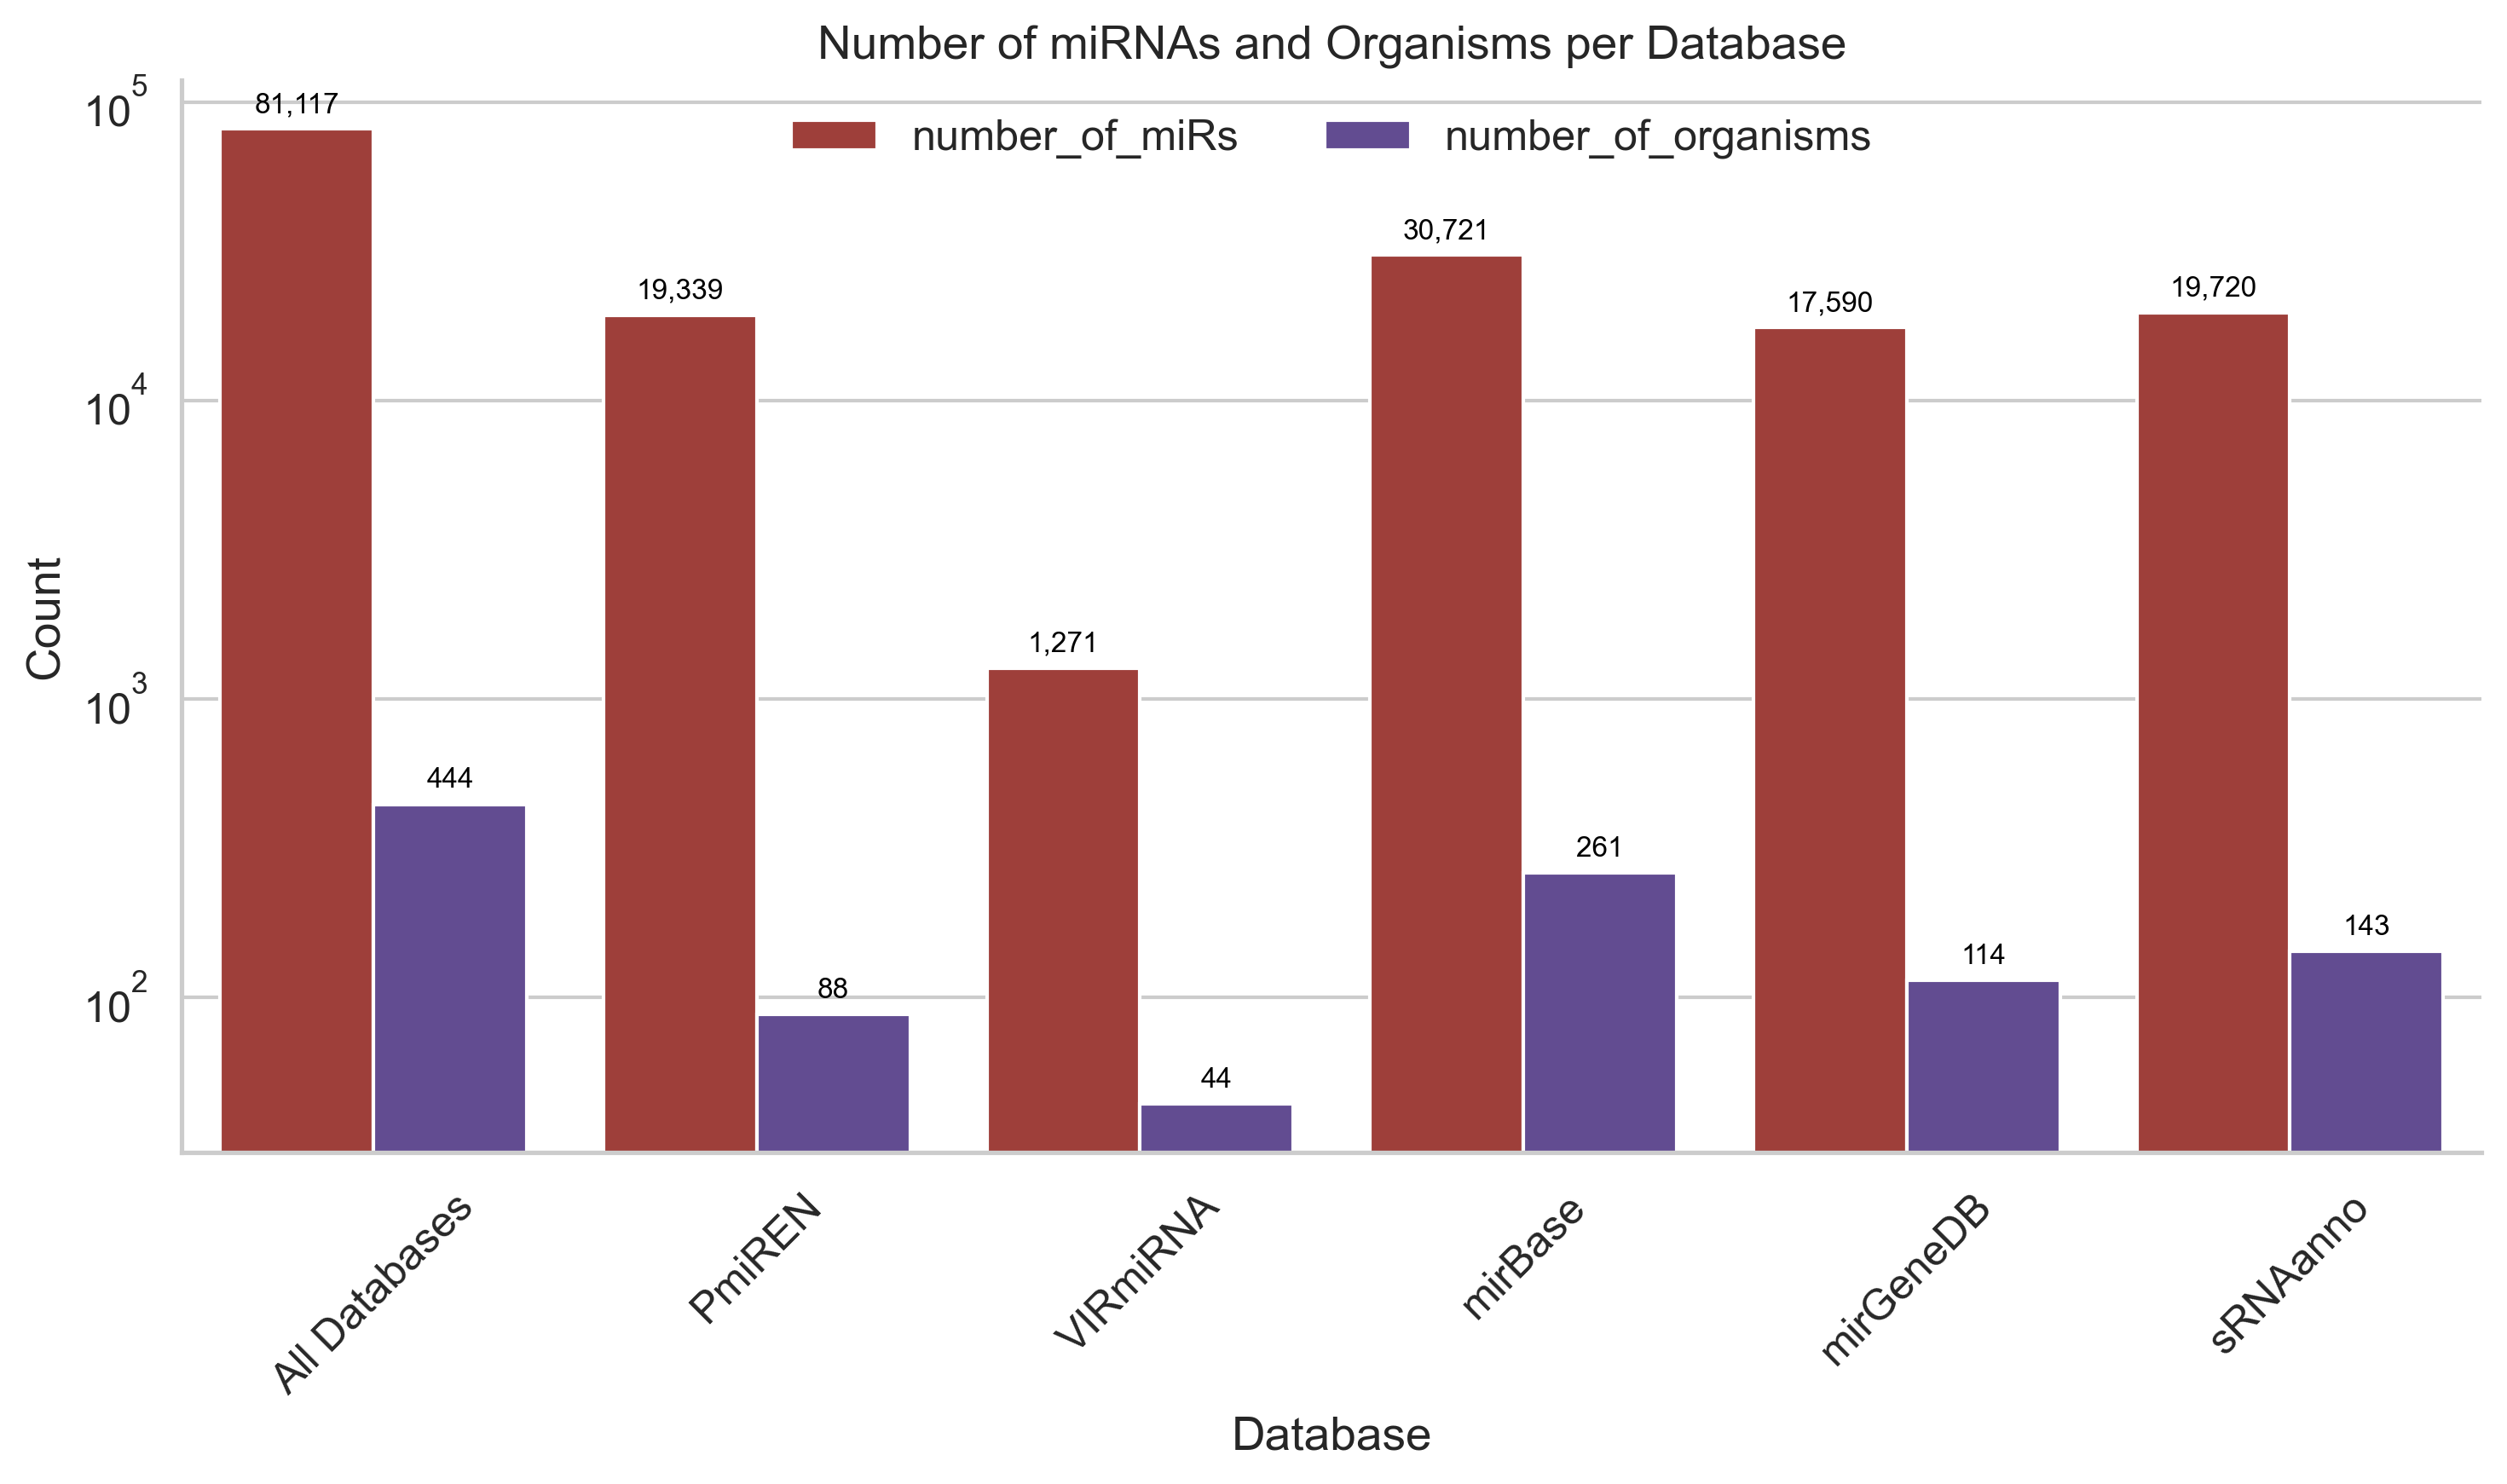

In [ ]:
# Plot miRs and organism counts
df_long = summary_df.melt(id_vars="source_db", 
                  value_vars=["number_of_miRs", "number_of_organisms"],
                  var_name="metric", value_name="count")
set_plot_styles()

plt.figure(figsize=(10,6))
ax = sns.barplot(data=df_long, x="source_db", y="count", hue="metric")
plt.ylabel("Count")
plt.xlabel("Database")
plt.title("Number of miRNAs and Organisms per Database")
plt.xticks(rotation=45)
plt.yscale("log")
plt.legend(ncol=2,frameon=False, bbox_to_anchor=(0.5, 1), loc='upper center')

for p in ax.patches:
    value = int(p.get_height())
    ax.annotate(
        text=f"{value:,}", 
        xy=(p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom',
        fontsize=8, color="black", 
        xytext=(0, 3), textcoords="offset points"
    )  

plt.tight_layout()
plt.savefig("/home/l/leitzb/miRNA/Harmonization-of-miRNA-databases/output/plots/miRNAs_and_organisms_per_db.png")
plt.show()
plt.close()

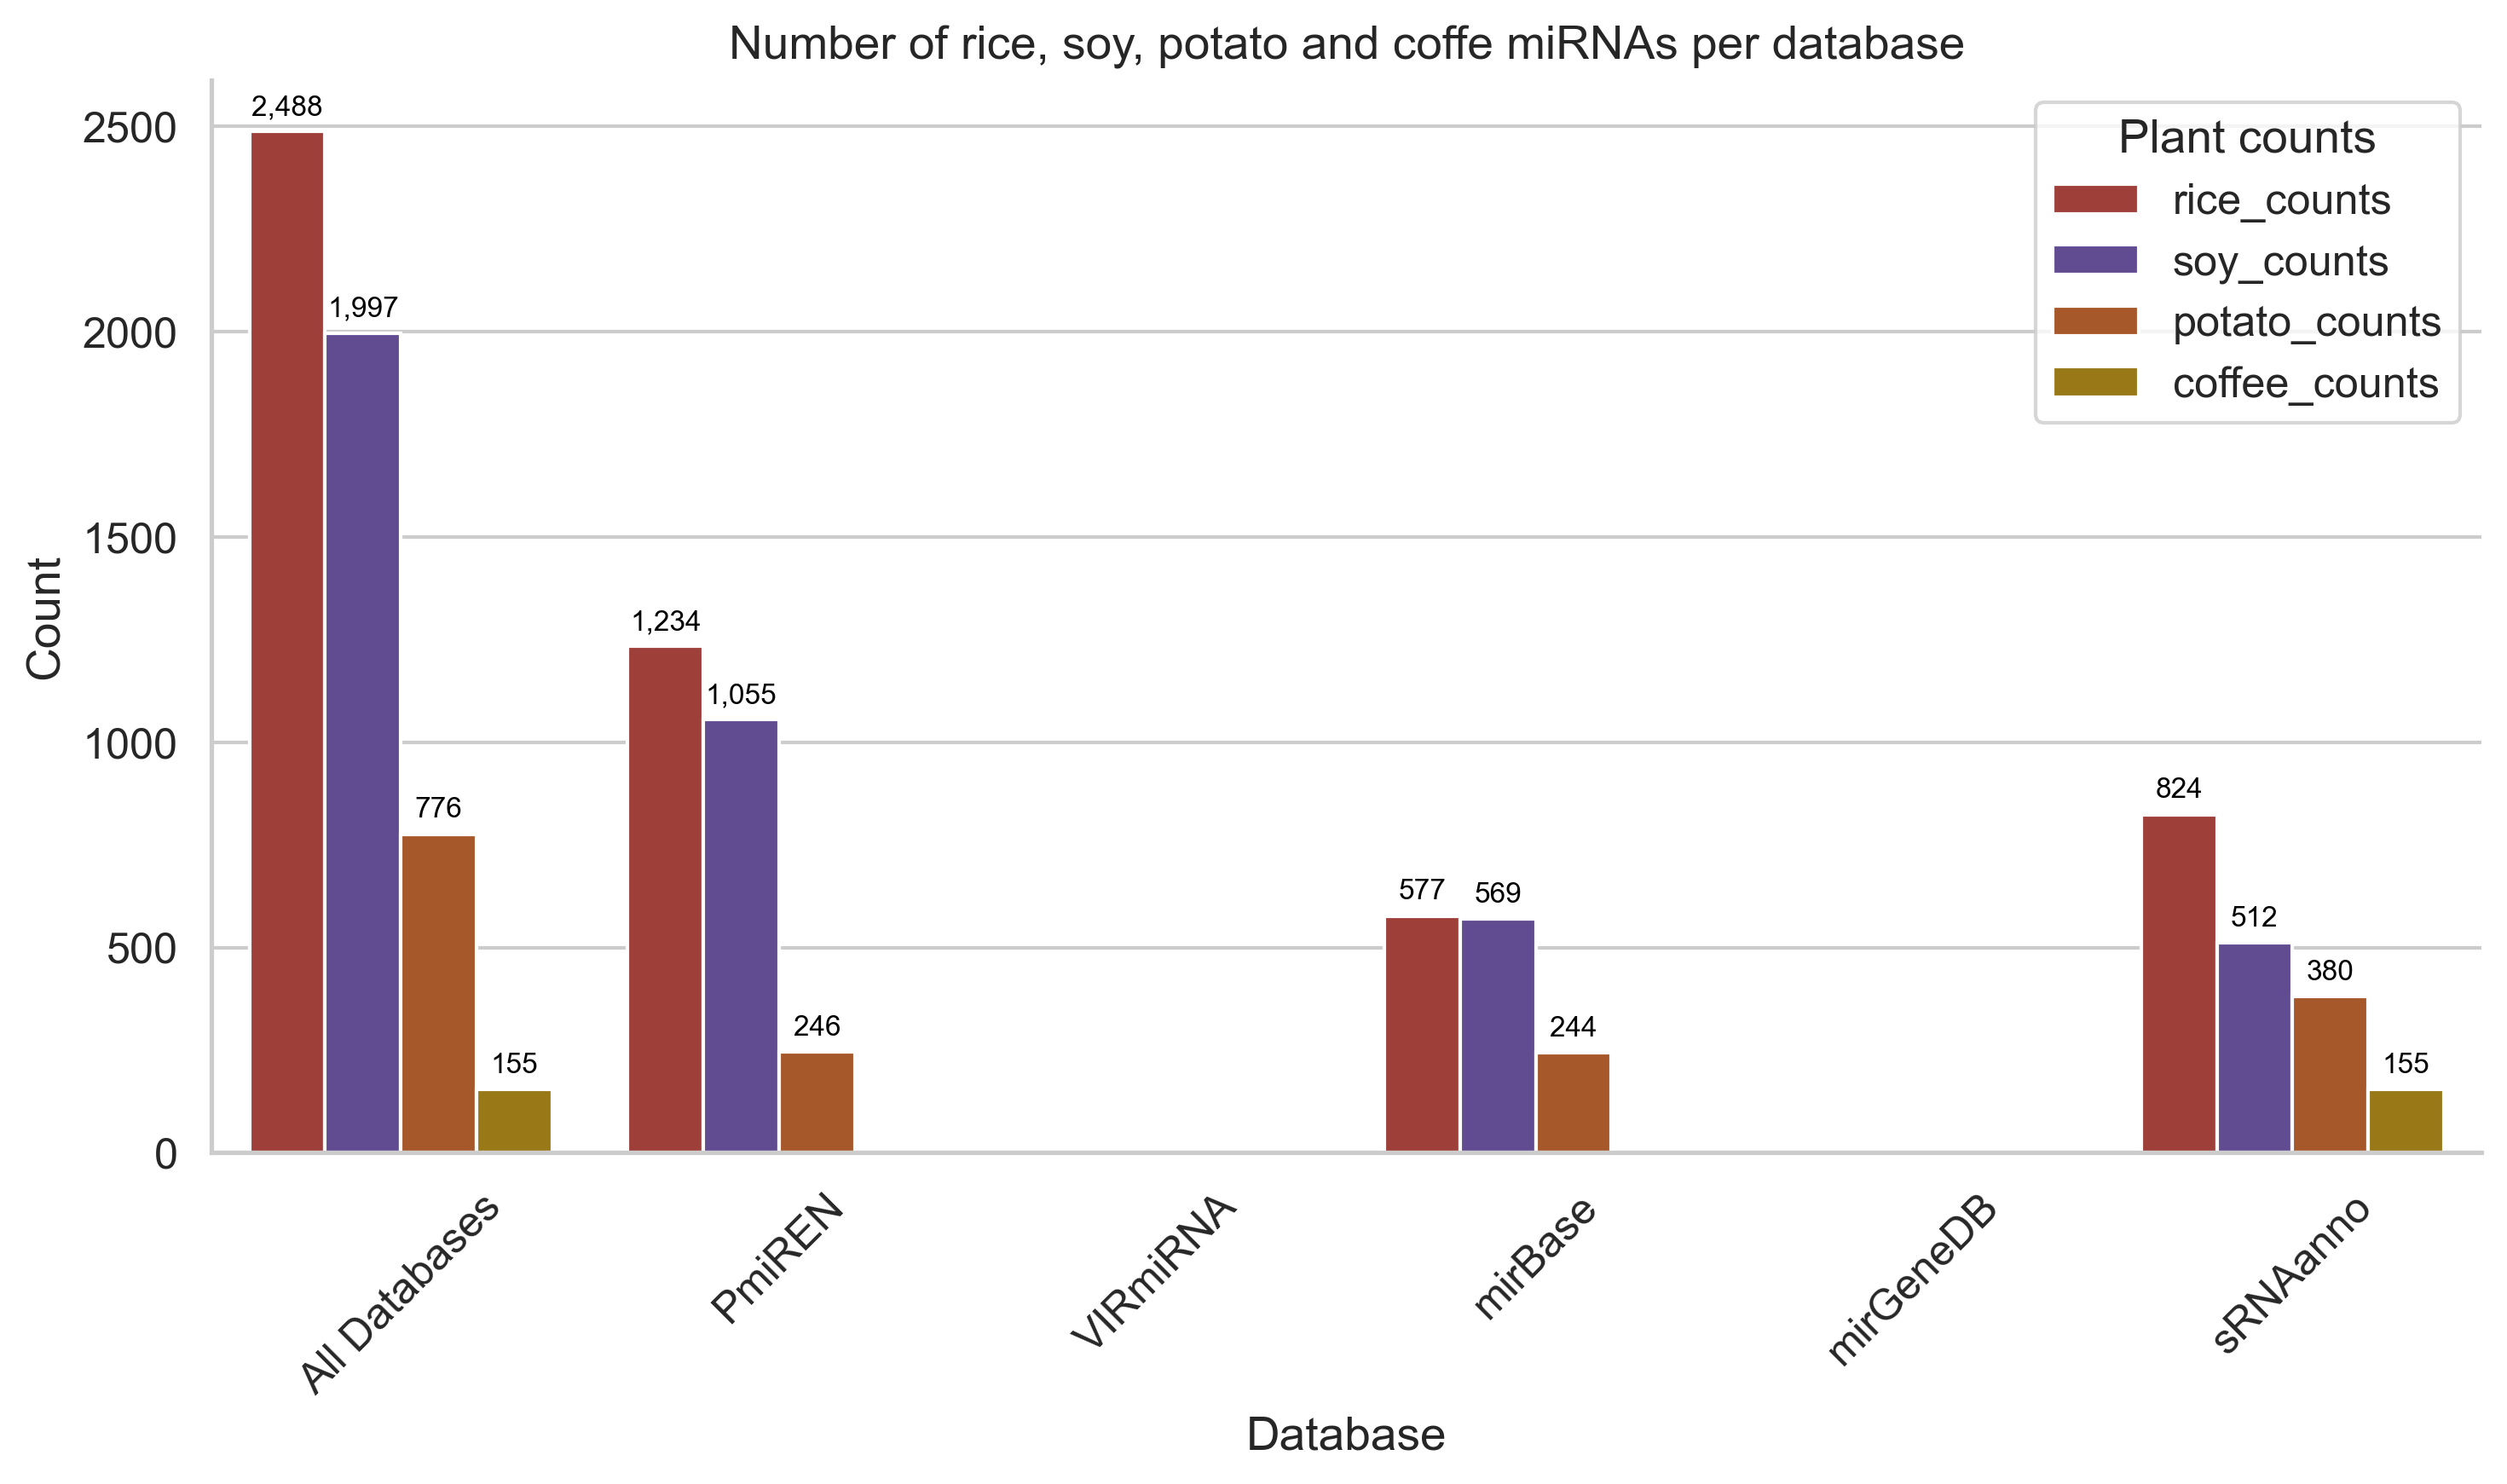

In [15]:
# Plot plant miRNA counts
df_long = summary_df.melt(id_vars="source_db", 
                  value_vars=["rice_counts", "soy_counts", "potato_counts", "coffee_counts"],
                  var_name="plant", value_name="count")
set_plot_styles()
plt.figure(figsize=(10,6))
ax = sns.barplot(data=df_long, x="source_db", y="count", hue="plant")
plt.ylabel("Count")
plt.xlabel("Database")
plt.title("Number of rice, soy, potato and coffe miRNAs per database")
plt.xticks(rotation=45)
plt.legend(title="Plant counts", frameon=True, bbox_to_anchor=(1, 1), loc='upper right')

for p in ax.patches:
    value = int(p.get_height())
    if value == 0: continue
    ax.annotate(
        text=f"{value:,}", 
        xy=(p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom',
        fontsize=8, color="black", 
        xytext=(0, 3), textcoords="offset points"
    )  

plt.tight_layout()
plt.savefig("/home/l/leitzb/miRNA/Harmonization-of-miRNA-databases/output/plots/plant_comparison.png")
plt.show()
plt.close()